# Load CIFAR10 DataSets

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam, rmsprop
from keras.preprocessing.image import ImageDataGenerator


%matplotlib inline

Using TensorFlow backend.


In [2]:
from cs231n.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=10000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the neural net classifier.
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

    # Subsample the data
    mask = range(num_training, num_training + num_validation)
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = range(num_training)
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = range(num_test)
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    return X_train, y_train, X_val, y_val, X_test, y_test


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

## One_hot API in Keras.utils: to_categorical 
# def one_hot(y):
#     y_tmp = np.zeros((y.shape[0], 10))
#     y_tmp[np.arange(y.shape[0]), y] = 1
#     return y_tmp

# y_train_onehot = one_hot(y_train)
# y_val_onehot = one_hot(y_val)
# y_test_onehot = one_hot(y_test)


Train data shape:  (49000, 32, 32, 3)
Train labels shape:  (49000,)
Validation data shape:  (1000, 32, 32, 3)
Validation labels shape:  (1000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


# Keras Model

In [3]:
""""""
num_classes = 10

# one-hot
y_train_categorical = to_categorical(y_train, num_classes)
y_val_categorical = to_categorical(y_val, num_classes)
y_test_categorical = to_categorical(y_test, num_classes)

# data for training 
X = X_train
y = y_train_categorical

""""""

model = Sequential()

model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=X.shape[1:]))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())


model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())

model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())

model.add(Flatten())

# fc1
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# fc2
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# fc3 + softmax
model.add(Dense(num_classes, activation='softmax'))


model.summary()

    

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_3 (Batch (None, 16, 16, 64)        256       
__________

In [4]:
# Data Augmentation
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
    )

datagen.fit(X)

In [5]:
# Compile the model
model.compile(optimizer=Adam(3e-4), loss='categorical_crossentropy', metrics=['accuracy'])

batch_size = 64
epoch = 10

# Training with data augmentation
history = model.fit_generator(datagen.flow(X, y, batch_size=batch_size),
                    steps_per_epoch=X.shape[0] // batch_size,
                    epochs=epoch,
                    verbose=1,
                    validation_data=(X_val,y_val_categorical))


# Training
# history = model.fit(X, y, batch_size=64, epochs=10, validation_data=(X_val, y_val_categorical))


Epoch 1/10
765/765 [==============================] - 698s - loss: 2.0466 - acc: 0.3745 - val_loss: 1.3125 - val_acc: 0.5420
Epoch 2/10
765/765 [==============================] - 945s - loss: 1.4448 - acc: 0.5021 - val_loss: 1.0679 - val_acc: 0.6120
Epoch 3/10
765/765 [==============================] - 885s - loss: 1.2060 - acc: 0.5769 - val_loss: 0.9100 - val_acc: 0.6680
Epoch 4/10
765/765 [==============================] - 888s - loss: 1.0652 - acc: 0.6220 - val_loss: 0.8094 - val_acc: 0.7230
Epoch 5/10
765/765 [==============================] - 966s - loss: 0.9693 - acc: 0.6574 - val_loss: 0.7367 - val_acc: 0.7430
Epoch 6/10
765/765 [==============================] - 789s - loss: 0.8906 - acc: 0.6856 - val_loss: 0.7181 - val_acc: 0.7460
Epoch 7/10
765/765 [==============================] - 918s - loss: 0.8316 - acc: 0.7079 - val_loss: 0.6329 - val_acc: 0.7990
Epoch 8/10
765/765 [==============================] - 1203s - loss: 0.7835 - acc: 0.7281 - val_loss: 0.6233 - val_acc: 0.7950

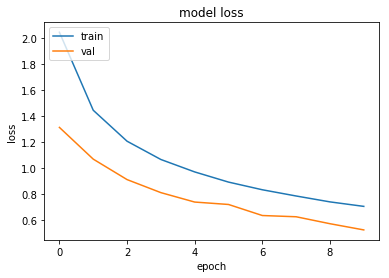

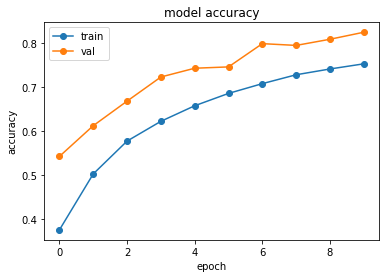

In [6]:
def plot_history(model_history):
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    # summarize history for accuracy
    plt.plot(history.history['acc'], '-o')
    plt.plot(history.history['val_acc'], '-o')
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    
# Visualize my data  
plot_history(history)

In [7]:
# Evaluate the model
scores = model.evaluate(X_test, y_test_categorical)

print('Loss: %.3f' % scores[0])
print('Accuracy: %.3f' % scores[1])

10000/10000 [==============================] - 54s    
Loss: 0.574
Accuracy: 0.802


### Describe what you did here
In this cell you should also write an explanation of what you did, any additional features that you implemented, and any visualizations or graphs that you make in the process of training and evaluating your network

Try with **VGGNet**-like deep convolutional network using Keras.
> + Network architecture: **[conv-conv-pool]x3 -> [affine-dropout]x2 -> [affine-softmax]**
  
> + **Data augmentation**

> + **Batch normalization**

> + **Dropout**


# Save Model 
You can save your **model** and **weights** using Keras API. It's really **HELPFUL** for you to reuse the model you trained!! 👍👍


In [8]:
# serialize model to JSON
model_json = model.to_json()
with open("keras_model.json", "w") as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
model.save_weights("keras_model.h5")
print("Saved keras_model to disk")

Saved keras_model to disk


# Load Model 
load the previous (pre-trained) model and weights.

In [13]:
from keras.models import model_from_json

# load json and create model
json_file = open('keras_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("keras_model.h5")
print("Loaded model from disk")

# evaluate loaded model on test data
loaded_model.compile(optimizer=Adam(3e-4), loss='categorical_crossentropy', metrics=['accuracy'])
score = loaded_model.evaluate(X_test, y_test_categorical, verbose=1)
print('Accuracy: %.3f' % scores[1]) # should be the same as above

Loaded model from disk
10000/10000 [==============================] - 61s    
Accuracy: 0.802


# Keep training ...

In [14]:
# Keep training (to see whether it helps improving accuracy)
loaded_model.fit_generator(datagen.flow(X, y, batch_size=batch_size),
                    steps_per_epoch=X.shape[0] // batch_size,
                    epochs=epoch,
                    verbose=1,
                    validation_data=(X_val,y_val_categorical))
# Evaluate the model
another_scores = loaded_model.evaluate(X_test, y_test_categorical)

print('Loss: %.3f' % another_scores[0])
print('Accuracy: %.3f' % another_scores[1])

Epoch 1/10
765/765 [==============================] - 796s - loss: 0.6829 - acc: 0.7634 - val_loss: 0.5307 - val_acc: 0.8130
Epoch 2/10
765/765 [==============================] - 818s - loss: 0.6442 - acc: 0.7754 - val_loss: 0.5051 - val_acc: 0.8260
Epoch 3/10
765/765 [==============================] - 737s - loss: 0.6173 - acc: 0.7851 - val_loss: 0.4992 - val_acc: 0.8230
Epoch 4/10
765/765 [==============================] - 1833s - loss: 0.5932 - acc: 0.7936 - val_loss: 0.4748 - val_acc: 0.8420
Epoch 5/10
765/765 [==============================] - 712s - loss: 0.5727 - acc: 0.7999 - val_loss: 0.4478 - val_acc: 0.8570
Epoch 6/10
765/765 [==============================] - 714s - loss: 0.5534 - acc: 0.8075 - val_loss: 0.4444 - val_acc: 0.8560
Epoch 7/10
765/765 [==============================] - 814s - loss: 0.5358 - acc: 0.8132 - val_loss: 0.4472 - val_acc: 0.8470
Epoch 8/10
765/765 [==============================] - 889s - loss: 0.5180 - acc: 0.8196 - val_loss: 0.4559 - val_acc: 0.8460

With 20 epochs, I got an 85% accuracy of my model. Let's keep training up to 50 epochs to see the result

In [ ]:


# serialize model to JSON
model_json = model.to_json()
with open("keras_model_20epoch.json", "w") as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
model.save_weights("keras_model_20epoch.h5")
print("Saved keras_model to disk")